In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("scores_data.csv")

In [3]:
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [4]:
df.tail()

,Batch,User_ID,Score
144,AI_ELITE_4,uid_5,4 / 7
145,AI_ELITE_4,uid_4,4 / 7
146,AI_ELITE_4,uid_3,4 / 7
147,AI_ELITE_4,uid_2,3 / 7
148,AI_ELITE_4,uid_1,2 / 7


In [5]:
df.isnull().sum()

Batch          0
User_ID        0
   Score       0
dtype: int64

In [6]:
print(df.columns.tolist())


['Batch ', 'User_ID ', '   Score   ']


In [9]:
df.columns = df.columns.str.strip()
print(df.columns.tolist())

['Batch', 'User_ID', 'Score']


In [11]:
df['Obtained'] = df['Score'].apply(lambda x:int(x.split('/')[0].strip()))
df['Total'] = df['Score'].apply(lambda x: int(x.split('/')[1].strip()))

df[['Score', 'Obtained', 'Total']].head()

,Score,Obtained,Total
0,6 / 7,6,7
1,6 / 7,6,7
2,7 / 7,7,7
3,7 / 7,7,7
4,4 / 7,4,7


In [12]:
print(df.describe())


         Obtained  Total
count  149.000000  149.0
mean     4.382550    7.0
std      1.592199    0.0
min      0.000000    7.0
25%      3.000000    7.0
50%      4.000000    7.0
75%      5.000000    7.0
max      7.000000    7.0


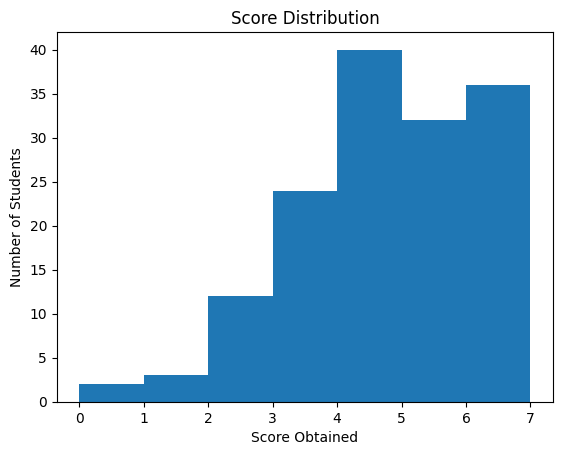

In [13]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['Obtained'], bins=7)
plt.xlabel("Score Obtained")
plt.ylabel("Number of Students")
plt.title("Score Distribution")
plt.show()


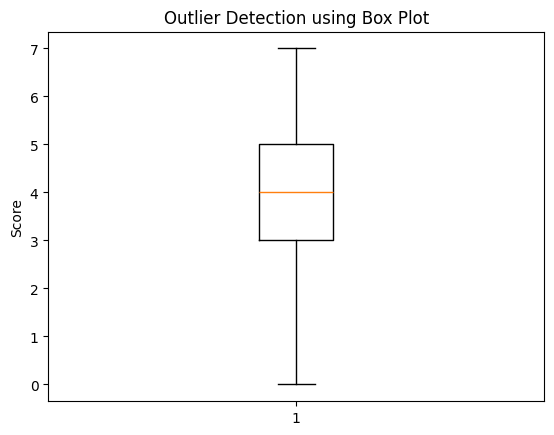

In [14]:
plt.figure()
plt.boxplot(df['Obtained'])
plt.ylabel("Score")
plt.title("Outlier Detection using Box Plot")
plt.show()


In [15]:
Q1 = df['Obtained'].quantile(0.25)
Q3 = df['Obtained'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Obtained'] < lower_bound) | (df['Obtained'] > upper_bound)]
outliers


,Batch,User_ID,Score,Obtained,Total


In [16]:
X = df[['Batch']]      # input
y = df['Obtained']     # output


In [17]:
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded.head()


,Batch_AI_ELITE_6,Batch_AI_ELITE_7
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42
)


In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [20]:
y_pred = model.predict(X_test)
y_pred[:5]


array([4.12820513, 4.97674419, 3.7027027 , 4.12820513, 4.12820513])

In [21]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 1.0859863441258792


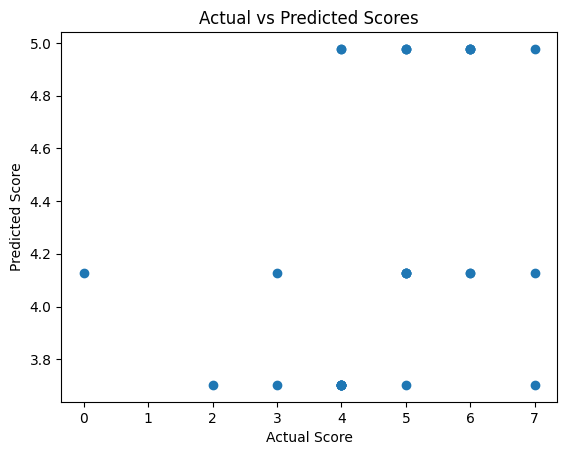

In [22]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted Scores")
plt.show()

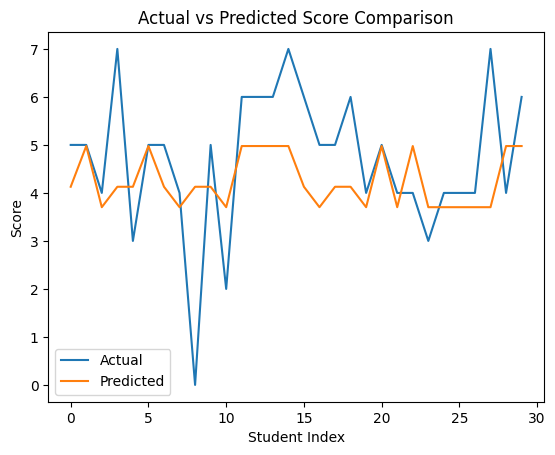

In [23]:
plt.figure()
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.xlabel("Student Index")
plt.ylabel("Score")
plt.title("Actual vs Predicted Score Comparison")
plt.legend()
plt.show()


In [28]:
new_student = pd.DataFrame({'Batch': ['AI_ELITE_7']})
new_student_encoded = pd.get_dummies(new_student)

new_student_encoded = new_student_encoded.reindex(
    columns=X_encoded.columns,
    fill_value=0
)

predicted_score = model.predict(new_student_encoded)
print("Predicted Score:", round(predicted_score[0], 2))


Predicted Score: 4.98
